# TASK 1: Data Preparation and Customer Analytics

Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

#### Background information for the task

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

#### Here is your task

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

To get started, download the resource csv data files below and begin performing high level data checks such as:

- Creating and interpreting high level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import xlrd        #used for reading data and formatting information from excel file

import warnings
warnings.filterwarnings('ignore')

## Transaction Data

In [2]:
#Reading the Excel File
transaction_data= pd.read_excel("S:\Downloads\QVI_transaction_data (1).xlsx")
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
#Getting concise summary
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [4]:
#Statistical Description
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
#Checking for null values
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

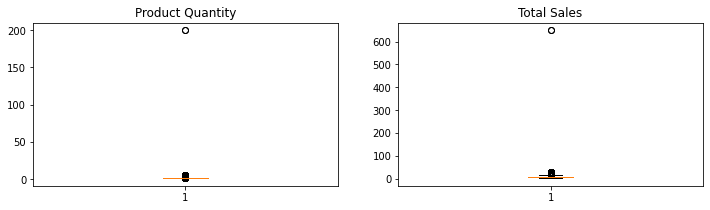

In [6]:
#Checking Outliers using Boxplot

figure,axis=  plt.subplots(1,2,figsize=(12,3))
#subplot of order (1 X 2 )
axis[0].boxplot(transaction_data['PROD_QTY'])
axis[1].boxplot(transaction_data['TOT_SALES'])
axis[0].set_title('Product Quantity')
axis[1].set_title('Total Sales')

plt.show()

In [7]:
#Removing Outliers
transaction_data= transaction_data[transaction_data['PROD_QTY']<50 ]
transacction_data= transaction_data[transaction_data['TOT_SALES']<100]
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


As we can see, removing the outliers decreased the transaction data by two rows. Ofcourse, this isn't a significant differnce, but removing these outliers may allow us to get slightly more accurate results.

In [8]:
#Converting Excel serial date format to the datetime format:-

date= transaction_data['DATE'].tolist()                   #storing the data column as a list

for i in range(len(date)):
    date[i]= xlrd.xldate_as_datetime(date[i],0)

transaction_data['DATE']= date
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


## Customer Data

In [9]:
#Reading the CSV File
customer_data= pd.read_csv("S:\Downloads\QVI_purchase_behaviour (1).csv")
customer_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [10]:
#Getting Summary
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
#Statistical Description
customer_data.describe(include='object')

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


In [12]:
#Check Null Values
customer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## Merging

In [13]:
#Merging two dataframe
df= pd.merge(transaction_data,customer_data, on='LYLTY_CARD_NBR' )
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In PROD_NAME we have combination of Brand Name, Product Name, Product Name but we need to split it for better analysis.

In [14]:
df['BRAND_NAME']= df['PROD_NAME'].str.split().str[0]
#str.split(): splits by the white space , .str[0]: selects a first word from splitted string

df['PROD_SIZE']= df['PROD_NAME'].str.extract('(\d+)')
# (/d): to extract digit , '+'' : to extract whole  number

df['PRODUCT_NAME']= df['PROD_NAME'].str.replace('\d+g'," ")
# g: attach with number

df= df.loc[: , [ 'DATE','PROD_NBR','PRODUCT_NAME','BRAND_NAME','PROD_SIZE','PROD_QTY','TOT_SALES','LIFESTAGE','PREMIUM_CUSTOMER','STORE_NBR','LYLTY_CARD_NBR','TXN_ID']]
# loc: Used to access rows and columns.   ; Rearranging the column with all rows selected
df

,DATE,PROD_NBR,PRODUCT_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,LYLTY_CARD_NBR,TXN_ID
0,2018-10-17,5,Natural Chip Compny SeaSalt,Natural,175,2,6.0,YOUNG SINGLES/COUPLES,Premium,1,1000,1
1,2019-05-14,66,CCs Nacho Cheese,CCs,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget,1,1307,348
2,2018-11-10,96,WW Original Stacked Chips,WW,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget,1,1307,346
3,2019-03-09,54,CCs Original,CCs,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget,1,1307,347
4,2019-05-20,61,Smiths Crinkle Cut Chips Chicken,Smiths,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget,1,1343,383
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,89,Kettle Sweet Chilli And Sour Cream,Kettle,175,2,10.8,YOUNG SINGLES/COUPLES,Premium,272,272319,270088
264830,2018-08-13,74,Tostitos Splash Of Lime,Tostitos,175,1,4.4,YOUNG SINGLES/COUPLES,Premium,272,272358,270154
264831,2018-11-06,51,Doritos Mexicana,Doritos,170,2,8.8,YOUNG SINGLES/COUPLES,Premium,272,272379,270187
264832,2018-12-27,42,Doritos Corn Chip Mexican Jalapeno,Doritos,150,2,7.8,YOUNG SINGLES/COUPLES,Premium,272,272379,270188


In [15]:
#Checking for Null Values
df.isnull().sum()

DATE                0
PROD_NBR            0
PRODUCT_NAME        0
BRAND_NAME          0
PROD_SIZE           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
dtype: int64

In [16]:
#Sort by date
df=df.sort_values(by='DATE')
df

,DATE,PROD_NBR,PRODUCT_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,LYLTY_CARD_NBR,TXN_ID
139041,2018-07-01,70,Tyrrells Crisps Lightly Salted,Tyrrells,165,2,8.4,RETIREES,Budget,27,27181,24218
199667,2018-07-01,103,RRD Steak & Chimuchurri,RRD,150,2,5.4,YOUNG FAMILIES,Budget,191,191099,192367
228014,2018-07-01,24,Grain Waves Sweet Chilli,Grain,210,2,7.2,YOUNG FAMILIES,Premium,257,257010,255769
59848,2018-07-01,114,Kettle Sensations Siracha Lime,Kettle,150,2,9.2,OLDER FAMILIES,Mainstream,48,48129,43842
3958,2018-07-01,23,Cheezels Cheese,Cheezels,330,2,11.4,MIDAGE SINGLES/COUPLES,Budget,203,203013,202339
...,...,...,...,...,...,...,...,...,...,...,...,...
106477,2019-06-30,57,Old El Paso Salsa Dip Tomato Mild,Old,300,2,10.2,OLDER SINGLES/COUPLES,Mainstream,67,67129,64592
64030,2019-06-30,44,Thins Chips Light& Tangy,Thins,175,2,6.6,OLDER FAMILIES,Mainstream,133,133121,136776
206707,2019-06-30,83,WW D/Style Chip Sea Salt,WW,200,2,3.8,YOUNG FAMILIES,Mainstream,257,257195,256935
122945,2019-06-30,91,CCs Tasty Cheese,CCs,175,2,4.2,OLDER SINGLES/COUPLES,Premium,45,45057,40739


In [17]:
pd.date_range(start='2018-07-01',end= '2019-06-30').difference(df['DATE'])
# (range of dates - our actual dates) = missing dates 

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

As suspected, there is one unrecorded date and thats of Christmas Day, since most stores are closed during that time.

In [18]:
# Filling entry for missing data
df=df.append({'DATE': pd.to_datetime('2018-12-25'),'PROD_NBR':0,'PRODUCT_NAME':'None','BRAND_NAME':'None','PROD_SIZE':0,'PROD_QTY':0,'TOT_SALES':0,'LIFESTAGE':'None','PREMIUM_CUSTOMER':'None','STORE_NBR':0,'LYLTY_CARD_NBR':0,'TXN_ID':0},ignore_index=True)
# Only append a dict if ignore_index=True

In [19]:
df=df.sort_values(by='DATE')
df

,DATE,PROD_NBR,PRODUCT_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,LYLTY_CARD_NBR,TXN_ID
0,2018-07-01,70,Tyrrells Crisps Lightly Salted,Tyrrells,165,2,8.4,RETIREES,Budget,27,27181,24218
478,2018-07-01,46,Kettle Original,Kettle,175,2,10.8,RETIREES,Premium,180,180179,182143
479,2018-07-01,56,Cheezels Cheese Box,Cheezels,125,2,4.2,OLDER FAMILIES,Premium,164,164069,164212
480,2018-07-01,24,Grain Waves Sweet Chilli,Grain,210,2,7.2,RETIREES,Premium,179,179216,180709
481,2018-07-01,80,Natural ChipCo Sea Salt & Vinegr,Natural,175,1,3.0,MIDAGE SINGLES/COUPLES,Premium,18,18221,15451
...,...,...,...,...,...,...,...,...,...,...,...,...
264340,2019-06-30,77,Doritos Corn Chips Nacho Cheese,Doritos,170,2,8.8,YOUNG SINGLES/COUPLES,Mainstream,230,230022,232028
264341,2019-06-30,12,Natural Chip Co Tmato Hrb&Spce,Natural,175,2,6.0,YOUNG SINGLES/COUPLES,Mainstream,101,101071,100462
264342,2019-06-30,47,Doritos Corn Chips Original,Doritos,170,2,8.8,YOUNG SINGLES/COUPLES,Mainstream,141,141226,142472
264333,2019-06-30,42,Doritos Corn Chip Mexican Jalapeno,Doritos,150,2,7.8,MIDAGE SINGLES/COUPLES,Mainstream,162,162118,162544


In [20]:
df.loc[df['DATE']=='2018-12-25']

,DATE,PROD_NBR,PRODUCT_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,LYLTY_CARD_NBR,TXN_ID
264834,2018-12-25,0,None,None,0,0,0.0,None,None,0,0,0


# Analysis and Visualization

In [21]:
date_sales= df.groupby('DATE')['TOT_SALES'].sum().reset_index()
date_sales

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
360,2019-06-26,5305.0
361,2019-06-27,5202.8
362,2019-06-28,5299.6
363,2019-06-29,5497.6


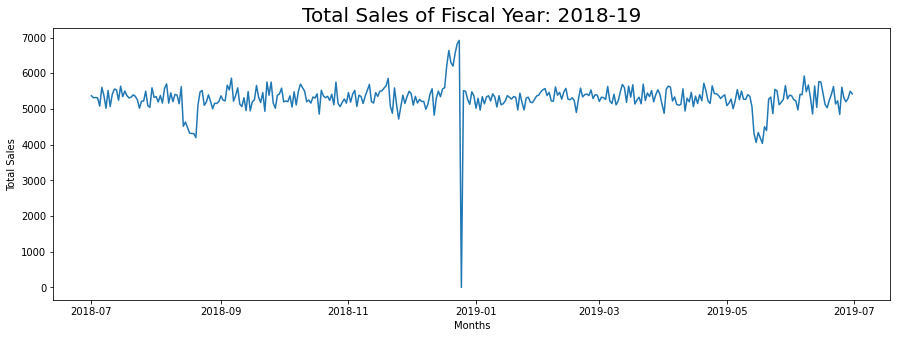

In [22]:
#Plotting a line graph of the totalsales for each date over the entire recorded duration
plt.figure(figsize=(15,5))
plt.plot(date_sales['DATE'], date_sales['TOT_SALES'])
plt.title('Total Sales of Fiscal Year: 2018-19',size=20)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.show()

As we can see from the line graph, the sales drop to zero on a certain date, which is 25th December(Christmas), which we manually set zero. However, the sales also reached an all-time high right before that, so we would need to analyze the transaction data from Decemeber 2018 to find out more about the sales

#### HOLIDAY SEASON

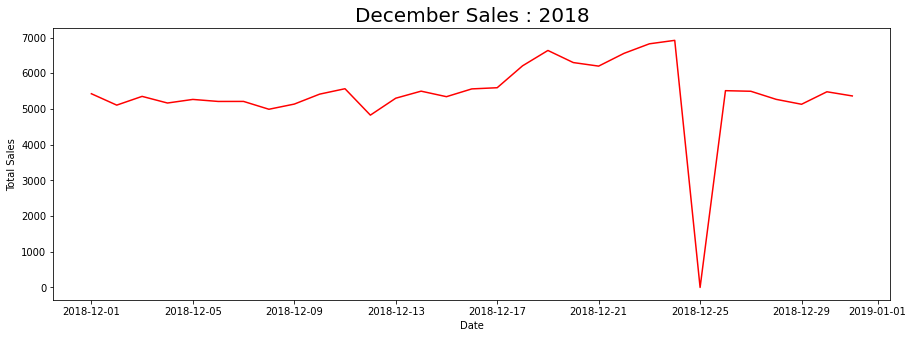

In [23]:
plt.figure(figsize=(15,5))
plt.plot( date_sales['DATE'][date_sales['DATE'].dt.month==12] , date_sales['TOT_SALES'][date_sales['DATE'].dt.month==12],color='r' )
plt.title('December Sales : 2018',size=20)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

As suspected, the sales reached an all time high the day before Christmas Day, which makes sense because people tend to purchase food items more when approaching holiday season. We can also see a consistent rise in the line graph between 21st December and 24th December, which means that these are the dates the store could target with promotions and discounts to increase the sales even more

We also want to know which package sizes sell the most to create promotions and discounts around them

In [24]:
holiday_sales= df[ (df['DATE']>= '2018-12-21') & (df['DATE']<= '2018-12-25')]
holiday_sales

,DATE,PROD_NBR,PRODUCT_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,LYLTY_CARD_NBR,TXN_ID
126267,2018-12-21,112,Tyrrells Crisps Ched & Chives,Tyrrells,165,2,8.4,MIDAGE SINGLES/COUPLES,Budget,75,75029,73499
126268,2018-12-21,57,Old El Paso Salsa Dip Tomato Mild,Old,300,1,5.1,RETIREES,Mainstream,120,120346,123864
126269,2018-12-21,57,Old El Paso Salsa Dip Tomato Mild,Old,300,2,10.2,RETIREES,Premium,40,40314,37546
126270,2018-12-21,80,Natural ChipCo Sea Salt & Vinegr,Natural,175,2,6.0,RETIREES,Mainstream,50,50452,46618
126271,2018-12-21,39,Smiths Crinkle Cut Tomato Salsa,Smiths,150,2,5.2,NEW FAMILIES,Mainstream,114,114085,117409
...,...,...,...,...,...,...,...,...,...,...,...,...
128703,2018-12-24,32,Kettle Sea Salt And Vinegar,Kettle,175,2,10.8,OLDER FAMILIES,Budget,26,26186,23091
128704,2018-12-24,63,Kettle Swt Pot Sea Salt,Kettle,135,2,8.4,OLDER SINGLES/COUPLES,Mainstream,171,171242,172523
128692,2018-12-24,1,Smiths Crinkle Cut Chips Barbecue,Smiths,170,2,5.8,RETIREES,Premium,178,178026,177722
129323,2018-12-24,107,Smiths Crinkle Cut French OnionDip,Smiths,150,2,5.2,OLDER FAMILIES,Budget,101,101001,100045


In [25]:
# Plotting a bar graph of the total sales for each package size between 21st Dec and 24th Dec
holiday_sizes=holiday_sales.groupby('PROD_SIZE')['TOT_SALES'].sum().reset_index()
holiday_sizes= holiday_sizes[holiday_sizes['PROD_SIZE']!=0]

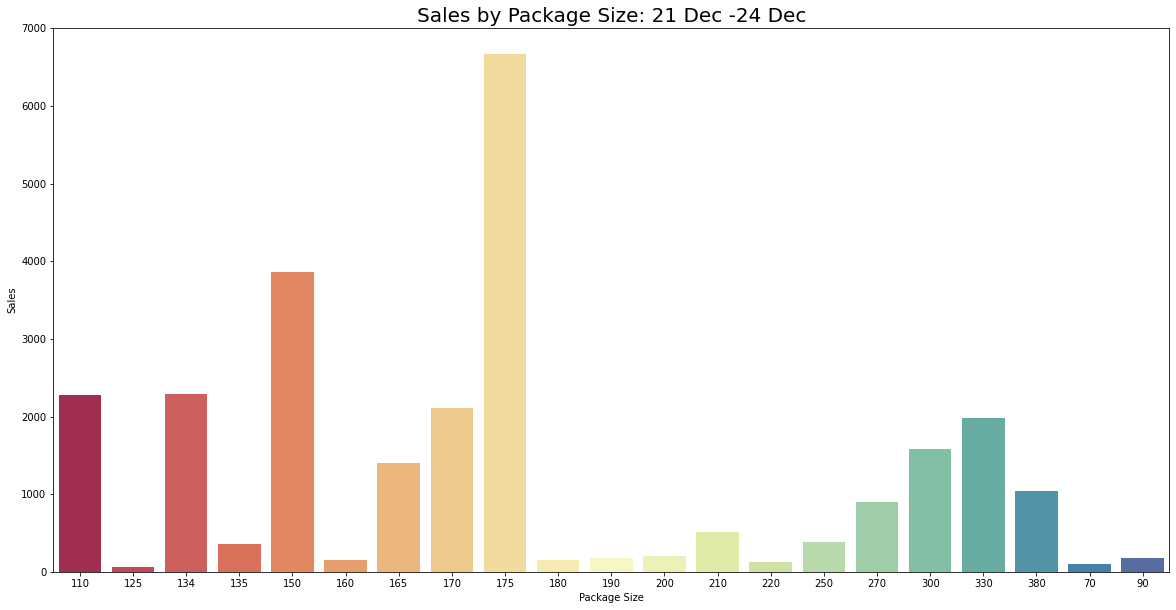

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='PROD_SIZE',y= 'TOT_SALES', data= holiday_sizes,palette='Spectral')
plt.title('Sales by Package Size: 21 Dec -24 Dec',size=20) 
plt.xlabel('Package Size')
plt.ylabel('Sales')
plt.show()

In [27]:
holiday_brands=holiday_sales.groupby('BRAND_NAME')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False)
holiday_brands.head()

,BRAND_NAME,TOT_SALES
12,Kettle,4940.0
6,Doritos,2948.5
21,Smiths,2914.5
17,Pringles,2290.3
24,Thins,1343.1


We can see that KETTLE was the highest-selling brand during the holiday season, so it will be wise to surround promotions and discouts around it to drive sales even more. And need to focus on 175 grams packet more

Lets see the holiday season statistics match with the ones during the entire duration of the recorded sales:-

In [28]:
package_size= df.groupby('PROD_SIZE')['TOT_SALES'].sum().reset_index()
package_size= package_size[package_size['PROD_SIZE']!=0]

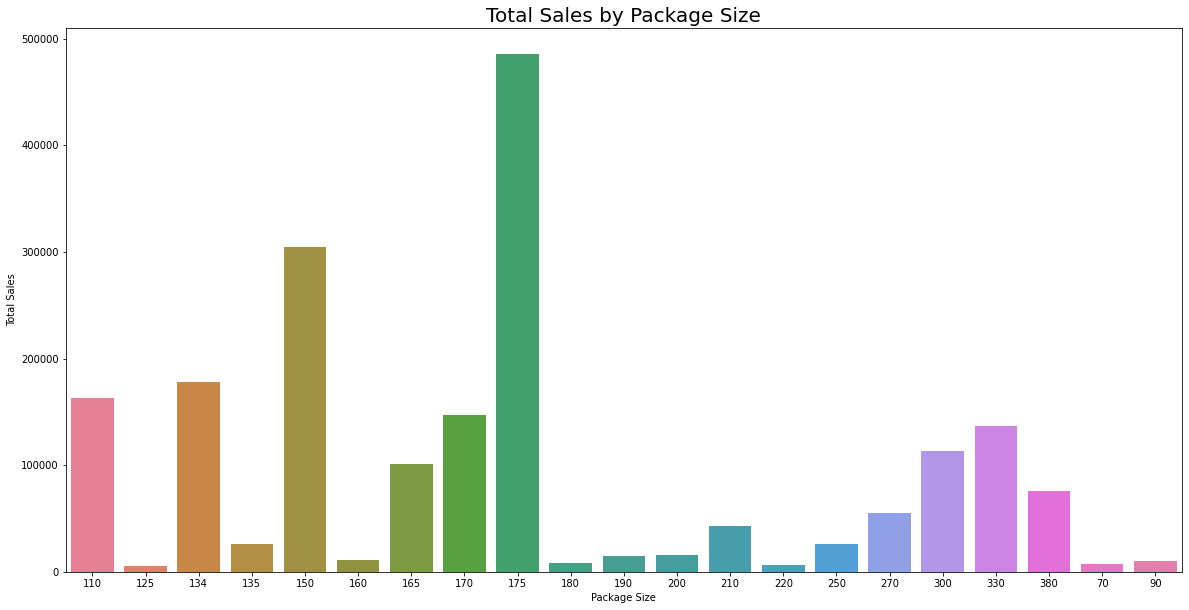

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='PROD_SIZE',y='TOT_SALES',data=package_size,palette='husl')
plt.title('Total Sales by Package Size',size=20)
plt.xlabel('Package Size')
plt.ylabel('Total Sales')
plt.show()

Seems like 175 grams and 150 grams have higgest sale in whole fiscal year too.

In [30]:
brand_sales=df.groupby('BRAND_NAME')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False)
brand_sales.head()

,BRAND_NAME,TOT_SALES
12,Kettle,390239.8
21,Smiths,210076.8
6,Doritos,201538.9
17,Pringles,177655.5
16,Old,90785.1


Just like holiday season sales, KETTLE remained the highest-selling brand during the entire duration of the recorded sales

Now let's move onto the Customer Analysis 

In [31]:
df['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
None                          1
Name: LIFESTAGE, dtype: int64

In [32]:
customer_purchase= df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
customer_purchase= customer_purchase[customer_purchase['LIFESTAGE']!='None']
customer_purchase

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
3,OLDER FAMILIES,352467.20
4,OLDER SINGLES/COUPLES,402426.75
5,RETIREES,366470.90
6,YOUNG FAMILIES,316160.10
7,YOUNG SINGLES/COUPLES,260405.30


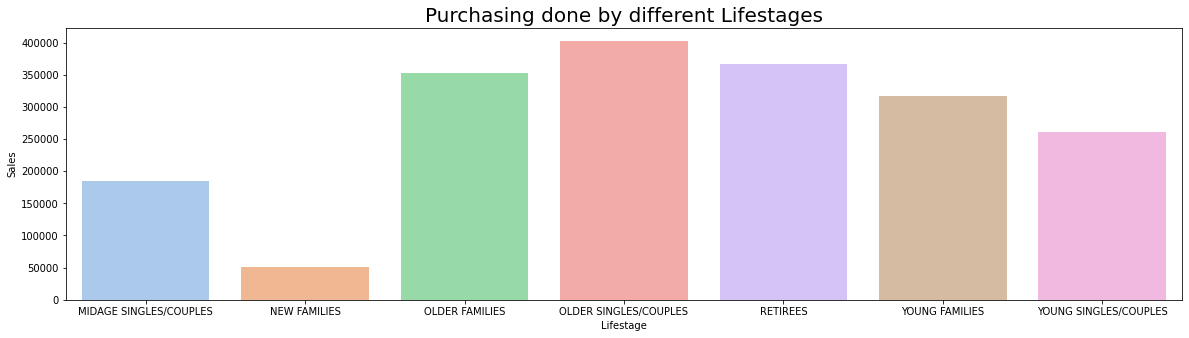

In [33]:
plt.figure(figsize=(20,5))
sns.barplot(x='LIFESTAGE',y='TOT_SALES',data=customer_purchase,palette='pastel')
plt.title('Purchasing done by different Lifestages',size=20)
plt.xlabel('Lifestage')
plt.ylabel('Sales')
plt.show()

It seems like OLDER SINGLES/COUPLES are the most loyal customers of the store and NEW FAMILIES are the least. Intrestingly, we can see a decreasing trend of purchasing according to age.

Lets see what sort of purchasing behaviour each age demographic has

In [44]:
lifestage_segment= df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index().sort_values(by=['LIFESTAGE','PREMIUM_CUSTOMER'])
lifestage_segment= lifestage_segment[lifestage_segment['LIFESTAGE']!='None']
lifestage_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
7,OLDER FAMILIES,Budget,168363.25
8,OLDER FAMILIES,Mainstream,103445.55
9,OLDER FAMILIES,Premium,80658.40
10,OLDER SINGLES/COUPLES,Budget,136769.80


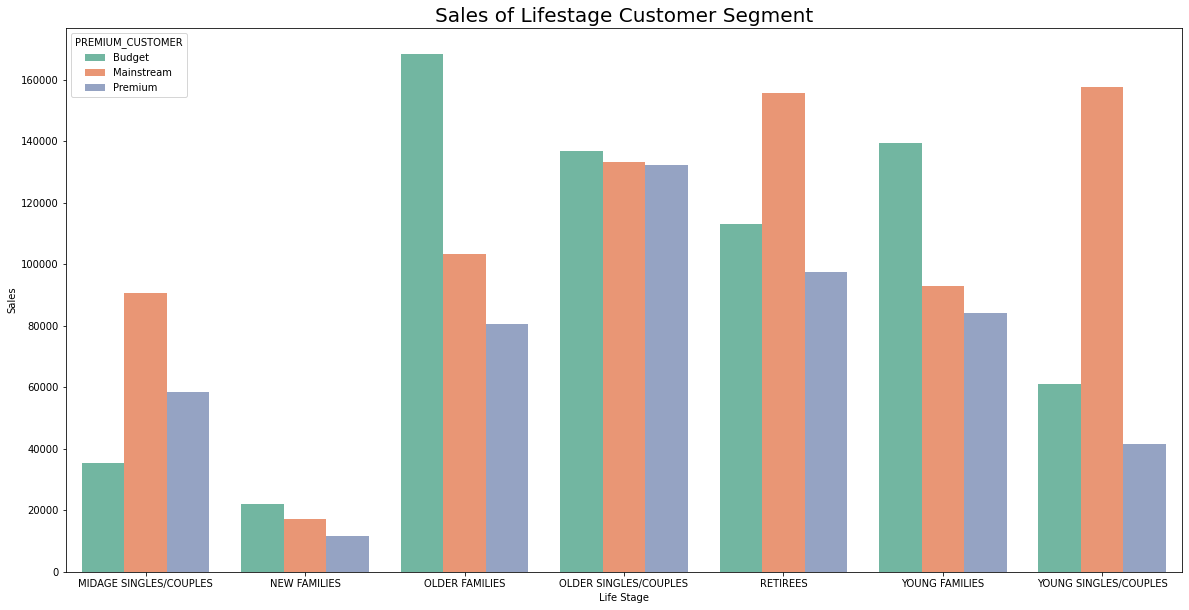

In [54]:
#Plotting a bar graph for total sales of each age demographic with customer segmnent

plt.figure(figsize=(20,10))
sns.barplot(x='LIFESTAGE',y='TOT_SALES',data=lifestage_segment,hue='PREMIUM_CUSTOMER',palette='Set2')
plt.title('Sales of Lifestage Customer Segment',size=20)
plt.xlabel('Life Stage')
plt.ylabel('Sales')
plt.show()

OLDER FAMILIES are highest Budget customers, RETIREES are highest Mainstream customer while OLDER SINGLES/COUPLES are highest Premium customer, these are the age demographic to target for payment plans and promotions to drive sales even more since they are more likely to pay more per packet of chips than others

# Conclusion:

- Generally, sales gradually increase during the holiday season and are the highest the day before Christmas Day, but suddenly decrease right after, so this would be the ideal time for any promotional campaigns or discount.



- The 175 gramme package size is the highest-selling package size during the holiday season with KETTLE® being the highest-selling brand.





- KETTLE® is the also the highest-selling brand during the entire year, also the 175 grams package size is the highest-selling package size, on average, with a difference of nearly 37% from the second highest-selling package size.



- OLDER SINGLES/COUPLES are the most loyal customers of the store and NEW FAMILIES are the least.



- Highest Customer:- Premium: OLDER SINGLES/COUPLES , Mainstream: RETIREES , Budget: OLDER FAMILIES